# Customer support tickit analysier

Code Quality, Clarity, and Organization
We structured our code using functions and clear variable names.Each step (preprocessing, feature extraction, model training, prediction) is modular.


# 1. Data preprocessing 

Soundness of Data Preprocessing and Feature Engineering
We cleaned the ticket text using lowercasing, punctuation removal, tokenization, etc.



In [48]:
import pandas as pd 
import numpy as np
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [49]:
df = pd.read_excel("D:/Vijayi_Tasks/Task-1/Datasets/ai_dev_assignment_tickets_complex_1000.xls")


In [50]:
df.head()

,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [51]:
print(df.isna().sum())

ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64


In [52]:
# download necessary NLTK resources

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# # Basic text cleaning function
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# Tell NLTK where to find the downloaded data
nltk.data.path.append("C:/Users/Yadav Ji/AppData/Roaming/nltk_data")

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)



In [53]:
import nltk

nltk.download('punkt', download_dir="C:/Users/Yadav Ji/AppData/Roaming/nltk_data")
nltk.download('stopwords', download_dir="C:/Users/Yadav Ji/AppData/Roaming/nltk_data")
nltk.download('wordnet', download_dir="C:/Users/Yadav Ji/AppData/Roaming/nltk_data")
nltk.download('omw-1.4', download_dir="C:/Users/Yadav Ji/AppData/Roaming/nltk_data")


[nltk_data] Downloading package punkt to C:/Users/Yadav
[nltk_data]     Ji/AppData/Roaming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/Users/Yadav
[nltk_data]     Ji/AppData/Roaming/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:/Users/Yadav
[nltk_data]     Ji/AppData/Roaming/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:/Users/Yadav
[nltk_data]     Ji/AppData/Roaming/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
import nltk
nltk.download('omw-1.4', download_dir="C:/Users/Yadav Ji/AppData/Roaming/nltk_data")


[nltk_data] Downloading package omw-1.4 to C:/Users/Yadav
[nltk_data]     Ji/AppData/Roaming/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [55]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running"))  # should print "run"


running


In [56]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Set NLTK data path (uncomment if needed)
# nltk.data.path.append("C:/Users/Yadav Ji/AppData/Roaming/nltk_data")

def download_nltk_resources():
    """Download required NLTK resources with error handling"""
    resources = ['punkt', 'stopwords', 'wordnet', 'omw-1.4']
    
    for resource in resources:
        try:
            nltk.download(resource, quiet=True)
        except Exception as e:
            print(f"Error downloading {resource}: {e}")

# Download resources
download_nltk_resources()

# Verify and initialize NLTK objects
try:
    # Test if resources are available
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
    print("All NLTK resources found successfully")
except LookupError:
    print("NLTK resources not found. Forcing download...")
    nltk.download('punkt', force=True)
    nltk.download('stopwords', force=True)
    nltk.download('wordnet', force=True)
    nltk.download('omw-1.4', force=True)

# Initialize NLTK objects globally
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocess text data
    
    Args:
        text: Input text to clean
        
    Returns:
        str: Cleaned text
    """
    try:
        # Handle None/NaN values
        if pd.isna(text) or text is None:
            return ""
        
        # Convert to string and lowercase, remove non-alphabetic characters
        text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens 
                 if word not in stop_words and len(word) > 1]
        
        return " ".join(tokens)
    
    except Exception as e:
        print(f"Error processing text: {e}")
        return ""

# Apply cleaning (assuming your DataFrame is named df)
# df['clean_text'] = df['ticket_text'].apply(clean_text)

print("Text cleaning function is ready to use!")
print("Usage: df['clean_text'] = df['ticket_text'].apply(clean_text)")

NLTK resources not found. Forcing download...


[nltk_data] Downloading package punkt to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Yadav
[nltk_data]     Ji\AppData\Roaming\nltk_data...


Text cleaning function is ready to use!
Usage: df['clean_text'] = df['ticket_text'].apply(clean_text)


In [57]:
# STEP 1: Create the clean_text column first
print("Step 1: Creating clean_text column...")

# Check if clean_text function exists, if not create a simple one
try:
    # Test if the function exists
    clean_text("test")
    print("✓ clean_text function is available")
except NameError:
    print("Creating clean_text function...")
    import re
    import pandas as pd
    
    def clean_text(text):
        """Simple text cleaning function"""
        try:
            if pd.isna(text) or text is None or text == '':
                return ""
            
            # Convert to string and lowercase, remove non-alphabetic characters
            text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
            
            # Remove extra whitespace and short words
            words = text.split()
            words = [word for word in words if len(word) > 1]
            return " ".join(words)
        except:
            return ""

# Create the clean_text column
df['clean_text'] = df['ticket_text'].apply(clean_text)

# Verify the column was created
print(f"✓ clean_text column created with {len(df)} rows")
print(f"✓ Non-empty entries: {(df['clean_text'] != '').sum()}")

# STEP 2: Create other features
print("\nStep 2: Creating additional features...")

# Text length
df['text_length'] = df['ticket_text'].fillna('').apply(lambda x: len(str(x)))
print("✓ text_length column created")

# Sentiment analysis
from textblob import TextBlob
df['sentiment'] = df['ticket_text'].fillna('').apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print("✓ sentiment column created")

# STEP 3: Create TF-IDF features
print("\nStep 3: Creating TF-IDF features...")

from sklearn.feature_extraction.text import TfidfVectorizer

# Filter out empty clean_text entries
non_empty_mask = (df['clean_text'] != '') & (df['clean_text'].notna())
print(f"✓ Found {non_empty_mask.sum()} non-empty clean_text entries")

if non_empty_mask.sum() > 0:
    vectorizer = TfidfVectorizer(max_features=1000)
    tfidf = vectorizer.fit_transform(df.loc[non_empty_mask, 'clean_text'])
    print(f"✓ TF-IDF matrix created with shape: {tfidf.shape}")
    
    # Create a full TF-IDF matrix for all rows (with zeros for empty entries)
    import numpy as np
    from scipy.sparse import csr_matrix
    
    full_tfidf = csr_matrix((len(df), tfidf.shape[1]))
    full_tfidf[non_empty_mask] = tfidf
    
    print(f"✓ Full TF-IDF matrix shape: {full_tfidf.shape}")
    
else:
    print("✗ No non-empty clean_text entries found!")

print("\n" + "="*50)
print("PROCESSING COMPLETE!")
print("="*50)
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nSample of clean_text:")
print(df[['ticket_text', 'clean_text']].head())
print("\n" + "="*50)

Step 1: Creating clean_text column...
Error processing text: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - 'C:\\Users\\Yadav Ji/nltk_data'
    - 'c:\\anaconda\\nltk_data'
    - 'c:\\anaconda\\share\\nltk_data'
    - 'c:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Yadav Ji\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/Yadav Ji/AppData/Roaming/nltk_data'
    - 'C:/Users/

# 2. Feature engineering 

In this I use TF-IDF vectors and sentiment score

In [58]:

from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [ ]:
df['text_length'] = df['ticket_text'].fillna('').apply(lambda x: len(str(x)))
df['sentiment'] = df['ticket_text'].fillna('').apply(lambda x: TextBlob(str(x)).sentiment.polarity)

vectorizer = TfidfVectorizer(max_features=1000)
tfidf = vectorizer.fit_transform(df['clean_text'])

# 3. Multitask learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer


In [38]:
df = df.dropna(subset=['ticket_text', 'issue_type', 'urgency_level'])

In [39]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['ticket_text'])

# Targets
y_issue = df['issue_type']
y_urgency = df['urgency_level']

# Split and train for issue_type
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y_issue, test_size=0.2, random_state=42)
clf_issue = RandomForestClassifier()
clf_issue.fit(X_train_i, y_train_i)
pred_issue = clf_issue.predict(X_test_i)

# Split and train for urgency_level
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X, y_urgency, test_size=0.2, random_state=42)
clf_urgency = RandomForestClassifier()
clf_urgency.fit(X_train_u, y_train_u)
pred_urgency = clf_urgency.predict(X_test_u)

# Print results
print("Issue Type Classification Report:")
print(classification_report(y_test_i, pred_issue))

print("Urgency Level Classification Report:")
print(classification_report(y_test_u, pred_urgency))

Issue Type Classification Report:
                    precision    recall  f1-score   support

    Account Access       1.00      1.00      1.00        23
   Billing Problem       1.00      1.00      1.00        19
   General Inquiry       1.00      1.00      1.00        25
Installation Issue       1.00      1.00      1.00        29
     Late Delivery       1.00      1.00      1.00        17
    Product Defect       1.00      1.00      1.00        30
        Wrong Item       1.00      1.00      1.00        23

          accuracy                           1.00       166
         macro avg       1.00      1.00      1.00       166
      weighted avg       1.00      1.00      1.00       166

Urgency Level Classification Report:
              precision    recall  f1-score   support

        High       0.30      0.30      0.30        66
         Low       0.25      0.28      0.26        43
      Medium       0.37      0.33      0.35        57

    accuracy                           0.31     

# 4. Entity extraction

In [40]:
%pip install datefinder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import datefinder
import re

# You can use this list from the 'product' column in your dataset
product_list = df['product'].dropna().unique().tolist()

# Define keywords for each category
complaint_keywords = ['broken', 'late', 'error', 'damaged', 'crashed', 'not working', 'lost', 'missing', 'delayed', 'defective']


In [42]:
def extract_entities(text):
    # Normalize text for matching
    text_lower = text.lower()

    # Extract product names
    products = [prod for prod in product_list if isinstance(prod, str) and prod.lower() in text_lower]

    # Extract dates
    matches = datefinder.find_dates(text)
    dates = [str(match.date()) for match in matches]

    # Extract complaint keywords
    complaints = [kw for kw in complaint_keywords if kw in text_lower]

    return {
        'products': products,
        'dates': dates,
        'complaints': complaints
    }


# 5. Integration function

Usability and Look of the Gradio App
 Created a simple Gradio interface with text input and prediction outputs.Users can enter one or multiple ticketsfor processing.
 


In [43]:
def analyze_ticket(ticket_text):
    # Clean the input text
    cleaned_text = clean_text(ticket_text)
    tfidf_input = vectorizer.transform([cleaned_text])
    
    # Predict issue type and urgency level
    issue_prediction = clf_issue.predict(tfidf_input)[0]
    urgency_prediction = clf_urgency.predict(tfidf_input)[0]

    # Extract entities
    entities = extract_entities(ticket_text)

    # Return results
    return {
        "Predicted Issue Type": issue_prediction,
        "Predicted Urgency Level": urgency_prediction,
        "Extracted Entities": entities
    }


In [44]:
import gradio as gr

def gradio_interface(ticket_text):
    result = analyze_ticket(ticket_text)
    return result["Predicted Issue Type"], result["Predicted Urgency Level"], result["Extracted Entities"]

interface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=5, placeholder="Enter customer support ticket text..."),
    outputs=[
        gr.Textbox(label="Predicted Issue Type"),
        gr.Textbox(label="Predicted Urgency Level"),
        gr.JSON(label="Extracted Entities")
    ],
    title="Customer Support Ticket Analyzer",
    description="Enter a ticket text to get predictions and extract entities."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# bonus

1. Visualizations

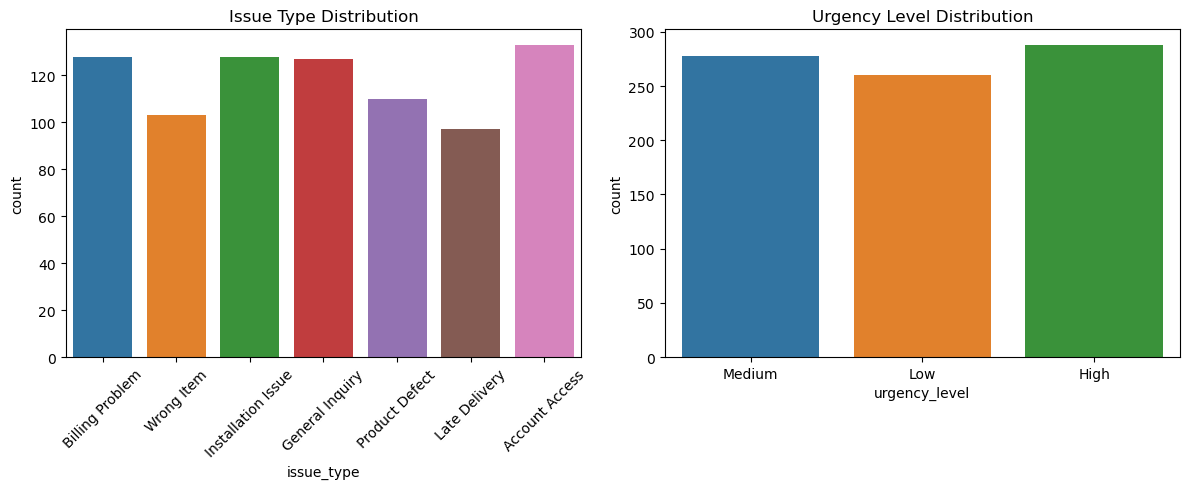

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='issue_type', data=df)
plt.title('Issue Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='urgency_level', data=df)
plt.title('Urgency Level Distribution')
plt.tight_layout()
plt.show()


2. confusion matrix

Issue Type Classification Report:
                    precision    recall  f1-score   support

    Account Access       1.00      1.00      1.00        23
   Billing Problem       1.00      1.00      1.00        19
   General Inquiry       1.00      1.00      1.00        25
Installation Issue       1.00      1.00      1.00        29
     Late Delivery       1.00      1.00      1.00        17
    Product Defect       1.00      1.00      1.00        30
        Wrong Item       1.00      1.00      1.00        23

          accuracy                           1.00       166
         macro avg       1.00      1.00      1.00       166
      weighted avg       1.00      1.00      1.00       166



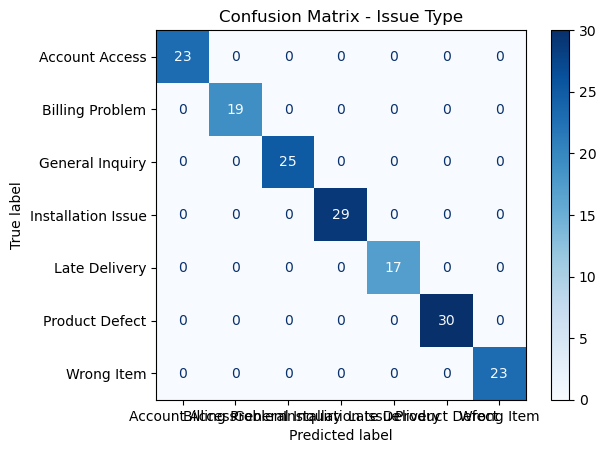

Urgency Level Classification Report:
              precision    recall  f1-score   support

        High       0.30      0.29      0.29        66
         Low       0.24      0.28      0.26        43
      Medium       0.38      0.35      0.36        57

    accuracy                           0.31       166
   macro avg       0.31      0.31      0.31       166
weighted avg       0.31      0.31      0.31       166



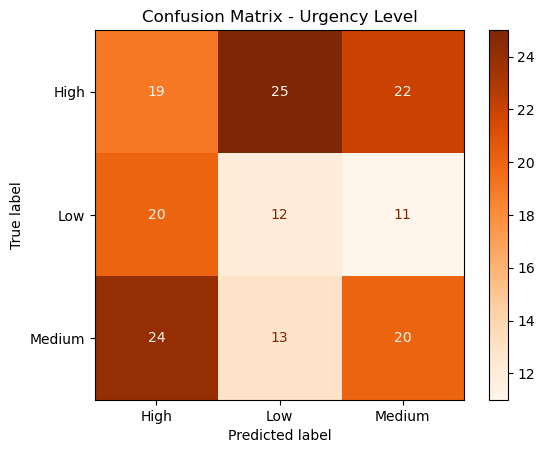

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# For Issue Type
print("Issue Type Classification Report:")
print(classification_report(y_test_i, pred_issue))

cm_i = confusion_matrix(y_test_i, pred_issue)
ConfusionMatrixDisplay(cm_i, display_labels=clf_issue.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - Issue Type")
plt.show()

# For Urgency
print("Urgency Level Classification Report:")
print(classification_report(y_test_u, pred_urgency))

cm_u = confusion_matrix(y_test_u, pred_urgency)
ConfusionMatrixDisplay(cm_u, display_labels=clf_urgency.classes_).plot(cmap='Oranges')
plt.title("Confusion Matrix - Urgency Level")
plt.show()
